In [1]:
import numpy as np
import matplotlib.pyplot as plt

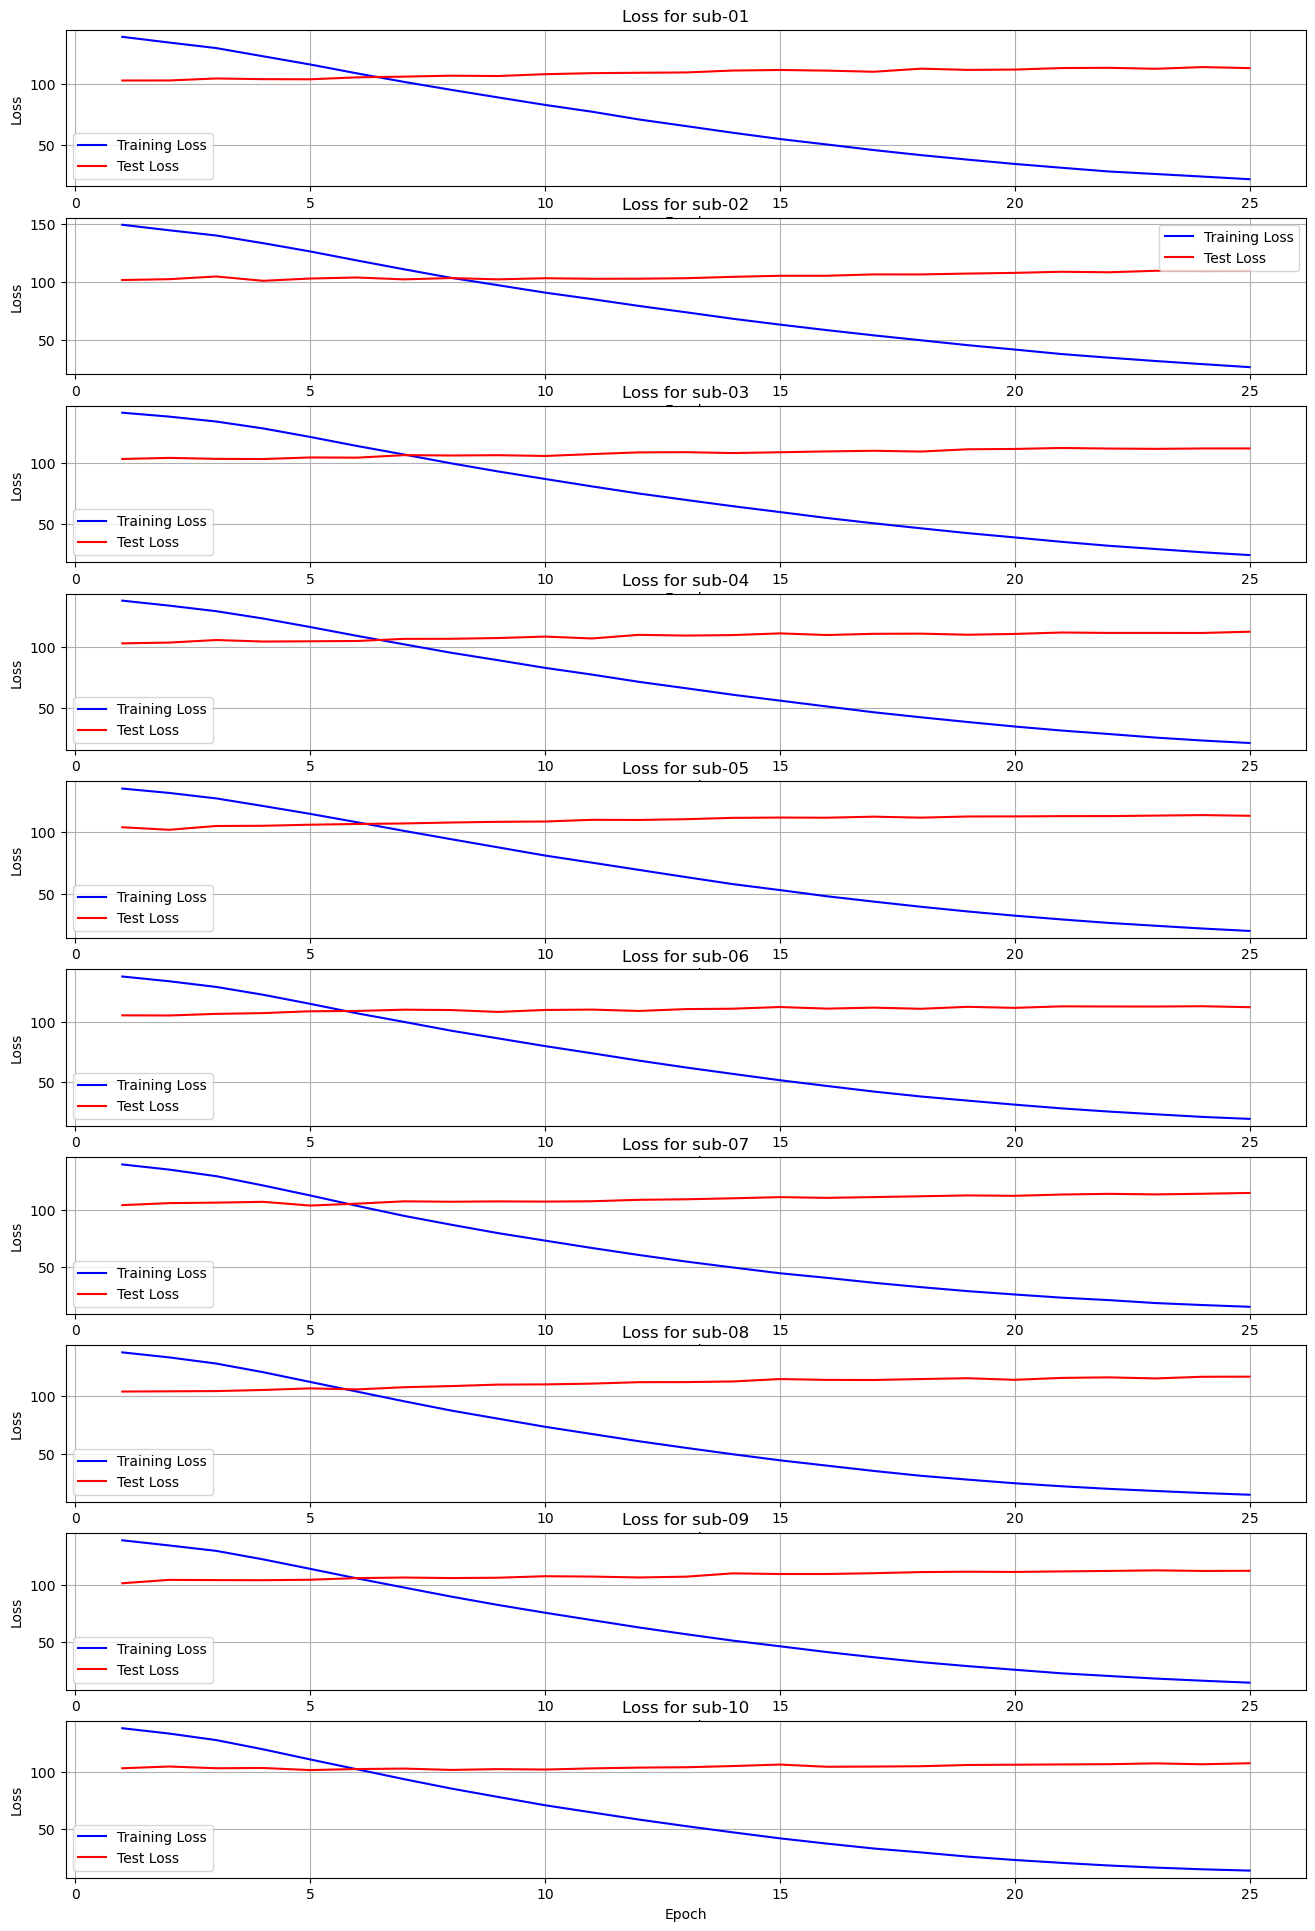

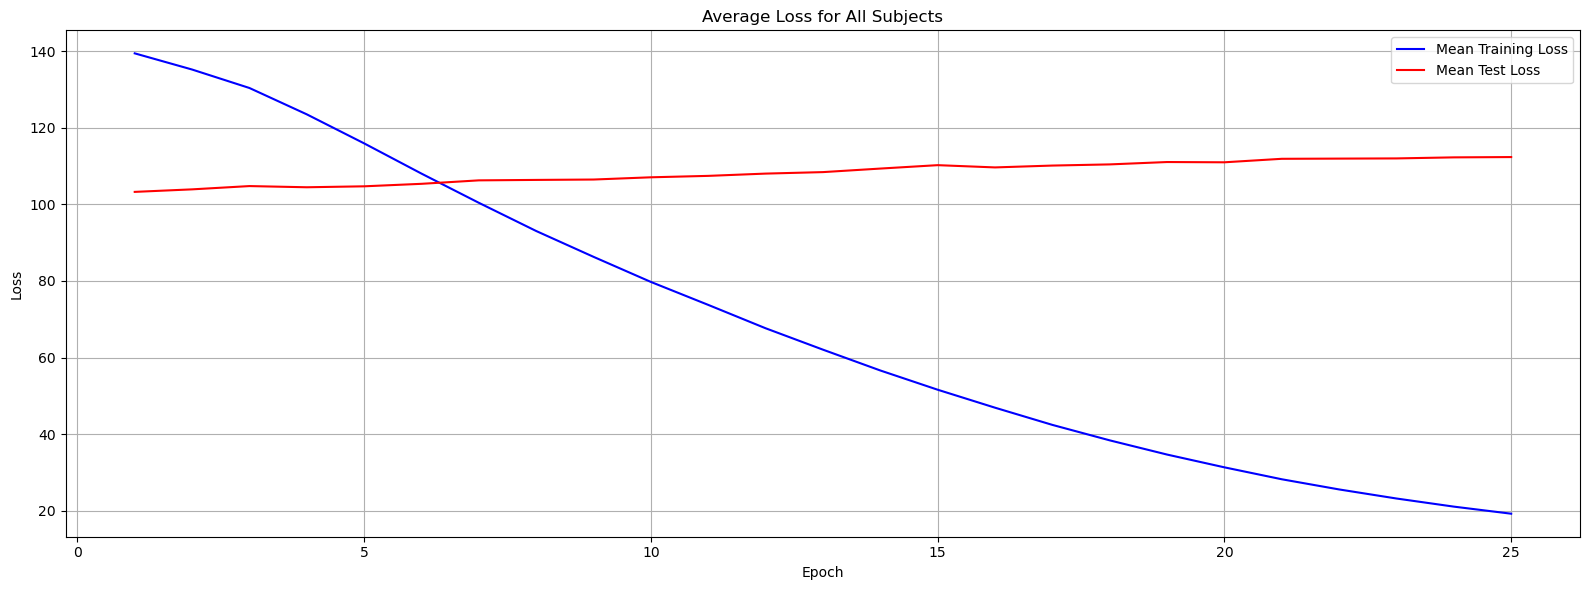

In [ ]:
subject_ids = [f'sub-{i:02d}' for i in range(1, 11)]

train_losses = []
test_losses = []
epochs = None

plt.figure(figsize=(16, 24))  

for i, subject_id in enumerate(subject_ids):
    loss_file = f'weights/ReAlnet_EEG/{subject_id}/loss.txt'
    data = np.loadtxt(loss_file)

    if epochs is None:
        epochs = np.arange(1, data.shape[0] + 1)

    train_loss = data[:, 2] 
    test_loss = data[:, 5] 

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    plt.subplot(len(subject_ids), 1, i + 1) 
    plt.plot(epochs, train_loss, label='Training Loss', color='blue')
    plt.plot(epochs, test_loss, label='Test Loss', color='red')
    plt.title(f'Loss for {subject_id}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)


mean_train_loss = np.mean(train_losses, axis=0)
mean_test_loss = np.mean(test_losses, axis=0)


plt.figure(figsize=(16, 6)) 
plt.plot(epochs, mean_train_loss, label='Mean Training Loss', color='blue')
plt.plot(epochs, mean_test_loss, label='Mean Test Loss', color='red')
plt.title('Average Loss for All Subjects')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Example predictions

Inputs of EEG-image pairs compared wth output EEG prediction.
Example uses model for subject02. 

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Directory containing the images
image_dir = "example-predict-sub-02"

# Collect image triples (assuming consistent naming)
indices = sorted(set(
    int(f.split('.')[0].lstrip('imageeegpred')) 
    for f in os.listdir(image_dir) 
    if f.endswith('.png')
))

# Function to display images side by side
def display_image_triples(image_dir, indices):
    for idx in indices:
        # Paths for each image in the triple
        img_path = os.path.join(image_dir, f"image{idx}.png")
        eeg_path = os.path.join(image_dir, f"eeg{idx}.png")
        pred_path = os.path.join(image_dir, f"pred{idx}.png")
        
        # Load images
        img = Image.open(img_path)
        eeg = Image.open(eeg_path)
        pred = Image.open(pred_path)

        # Create a plot with 3 subplots side by side
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
        for ax, image, title in zip(axes, [img, eeg, pred], ["Image", "EEG", "Prediction"]):
            ax.imshow(image)
            ax.set_title(title)
            ax.axis("off")  # Hide axes

        plt.tight_layout()
        plt.show()  # Display the images

# Display the images
display_image_triples(image_dir, indices)
